# Dense lyaer를 이용하여 (MNIST data, Fashion MNIST data) 분류하기

### key word: pytorch, sgd optimizer, adam optimizer, overfitting, drop out, batch normalization, train/test dataset, loss and accuracy
(key word에 대해서 검색하고 숙지한후 진행하는것을 추천드립니다.)


- 1. optimizer는 SGD,ADAM을 각각사용해보고 비교할것
- 2. overfitting을 방지하기 위한 대표적인 2가지 방법 (Drop out, Batch normalization) 사용하여 각 방법 비교해보기
- 3. 모델 layer수를 1.5배로 늘리고 기존것과 비교해보기
- 4. 비교는 train, test 둘다 loss 와 accuray에 대해서 할것

In [2]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# MNIST dataset

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 PyTorch 텐서로 변환
    transforms.Normalize((0.5,), (0.5,))  # 이미지를 정규화
])

train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

In [4]:
print("훈련 데이터의 형태:", train_set.data.shape)
print("테스트 데이터의 형태:", test_set.data.shape)
print("훈련 레이블의 형태:", train_set.targets.shape)
print("테스트 레이블의 형태:", test_set.targets.shape)

print("훈련 데이터의 최소값:", train_set.data.min())
print("훈련 데이터의 최대값:", train_set.data.max())

훈련 데이터의 형태: torch.Size([60000, 28, 28])
테스트 데이터의 형태: torch.Size([10000, 28, 28])
훈련 레이블의 형태: torch.Size([60000])
테스트 레이블의 형태: torch.Size([10000])
훈련 데이터의 최소값: tensor(0, dtype=torch.uint8)
훈련 데이터의 최대값: tensor(255, dtype=torch.uint8)


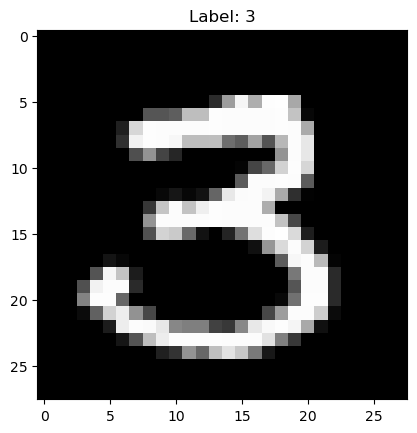

In [5]:
image, label = next(iter(train_loader))
plt.imshow(image[0].squeeze(), cmap='gray')
plt.title(f"Label: {label[0]}")
plt.show()

# Your code here

In [6]:
# Define model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # 입력 레이어
        self.fc2 = nn.Linear(128, 64)        # 은닉 레이어
        self.fc3 = nn.Linear(64, 10)         # 출력 레이어

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # 2D 텐서를 1D로 변환
        x = F.relu(self.fc1(x))  # ReLU 활성화 함수
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [7]:
# initialize model
model = NeuralNet()


In [8]:
# optimizer setting

optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 옵티마이저 사용


In [9]:
# define loss function

criterion = nn.CrossEntropyLoss()  # 크로스 엔트로피 손실 함수


In [13]:
# train code here
train_losses = []
train_accuracies = []

# train code here
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # 모델을 훈련 모드로 설정
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()  # 기울기 초기화
        outputs = model(images)  # 모델 예측
        loss = criterion(outputs, labels)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')



Epoch [1/5], Loss: 0.0496, Accuracy: 98.38%
Epoch [2/5], Loss: 0.0434, Accuracy: 98.51%
Epoch [3/5], Loss: 0.0438, Accuracy: 98.49%
Epoch [4/5], Loss: 0.0378, Accuracy: 98.74%
Epoch [5/5], Loss: 0.0383, Accuracy: 98.64%


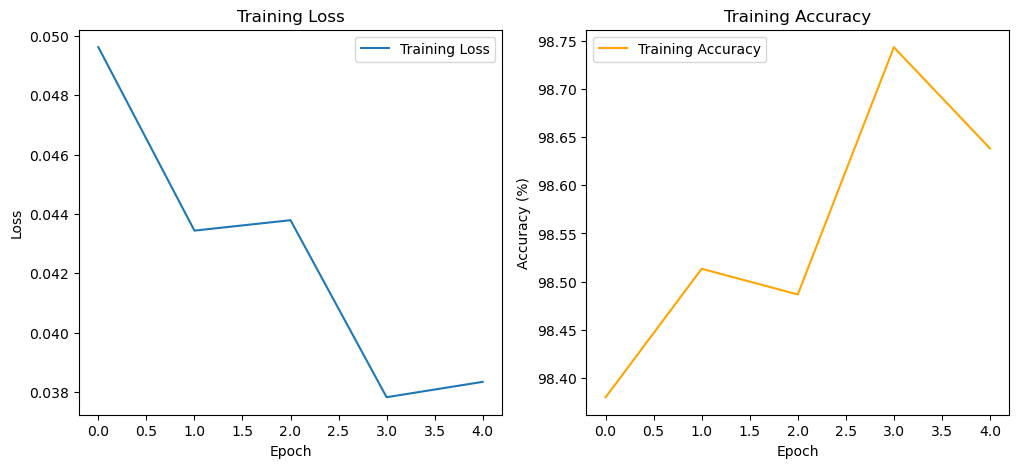

In [14]:
# plot result

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 플롯
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

# Fashion MNIST dataset

In [15]:
train_set = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)


100.0%
100.0%
100.0%
100.0%


In [16]:
print("훈련 데이터의 형태:", train_set.data.shape)
print("테스트 데이터의 형태:", test_set.data.shape)
print("훈련 레이블의 형태:", train_set.targets.shape)
print("테스트 레이블의 형태:", test_set.targets.shape)

print("훈련 데이터의 최소값:", train_set.data.min())
print("훈련 데이터의 최대값:", train_set.data.max())

훈련 데이터의 형태: torch.Size([60000, 28, 28])
테스트 데이터의 형태: torch.Size([10000, 28, 28])
훈련 레이블의 형태: torch.Size([60000])
테스트 레이블의 형태: torch.Size([10000])
훈련 데이터의 최소값: tensor(0, dtype=torch.uint8)
훈련 데이터의 최대값: tensor(255, dtype=torch.uint8)


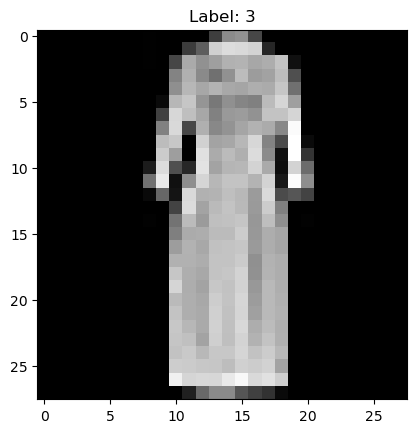

In [17]:
image, label = next(iter(train_loader))
plt.imshow(image[0].squeeze(), cmap='gray')
plt.title(f"Label: {label[0]}")
plt.show()

# Your code here

Epoch [1/5], Loss: 0.5473, Accuracy: 81.41%
Epoch [2/5], Loss: 0.3751, Accuracy: 86.36%
Epoch [3/5], Loss: 0.3424, Accuracy: 87.40%
Epoch [4/5], Loss: 0.3181, Accuracy: 88.28%
Epoch [5/5], Loss: 0.3014, Accuracy: 88.81%


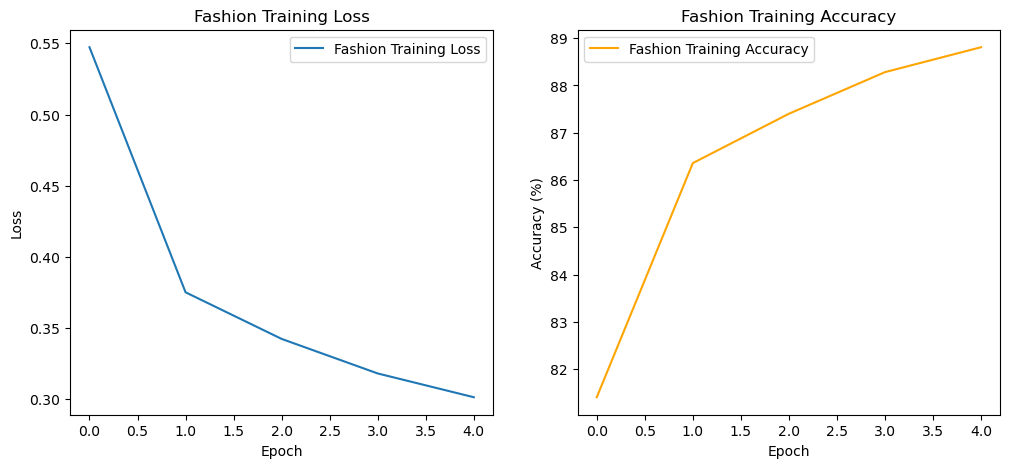

In [18]:
# fastion mnist dataset에도 mnist dataset에서 한것과 같이 수행할것

# 결과를 저장할 리스트 초기화
fashion_train_losses = []
fashion_train_accuracies = []

# train code here
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # 모델을 훈련 모드로 설정
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()  # 기울기 초기화
        outputs = model(images)  # 모델 예측
        loss = criterion(outputs, labels)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    fashion_train_losses.append(epoch_loss)
    fashion_train_accuracies.append(epoch_accuracy)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

# 결과 플롯
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fashion_train_losses, label='Fashion Training Loss')
plt.title('Fashion Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 플롯
plt.subplot(1, 2, 2)
plt.plot(fashion_train_accuracies, label='Fashion Training Accuracy', color='orange')
plt.title('Fashion Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()